
# Cyclistic Bike Share Analysis

### Import all the packages for this project

I've used numpy, pandas for analysis and matplotlib for visualization. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data into dataframe for analysis.

I've used collection of csv files from January 2020 to December 2020. I've only used the column that was needed for analysis. After filtering out unnecessary data, I've compiled all the data into one file named "year_data.csv".

In [2]:
data = pd.read_csv("assets/year_data.csv", index_col=0)

### Sort Data date wise in ascending order

In [3]:
# sort values
data = data.sort_values('started_at')
data.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,day_of_week,month
72502,98D355D9A9852BE9,classic_bike,2022-01-01 00:00:05,2022-01-01 00:01:48,casual,1.716667,5,1
67593,04706CA7F5BD25EE,electric_bike,2022-01-01 00:01:00,2022-01-01 00:04:39,casual,3.650000,5,1
63639,42178E850B92597A,electric_bike,2022-01-01 00:01:16,2022-01-01 00:32:14,casual,30.966667,5,1
72507,6B93C46E8F5B114C,classic_bike,2022-01-01 00:02:14,2022-01-01 00:31:07,casual,28.883333,5,1
72501,466943353EAC8022,classic_bike,2022-01-01 00:02:35,2022-01-01 00:31:04,casual,28.483333,5,1


### Finding missing values

I've already filtered out data before loading into dataframe. But it's necessary to find if it contains any missing values.

In [4]:
# Checking missing values
pd.isna(data).sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
ride_length      0
day_of_week      0
month            0
dtype: int64

In [5]:
# Just a top view of our dataframe columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5546628 entries, 72502 to 5464172
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ride_id        object 
 1   rideable_type  object 
 2   started_at     object 
 3   ended_at       object 
 4   member_casual  object 
 5   ride_length    float64
 6   day_of_week    int64  
 7   month          int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 380.9+ MB


## Descriptive analysis

In this analysis we'll try to find out how many customers are using Cyclistinc bike share services. How many are using as casual and how many are annual memebers. We'll try to find a brief summary first than we'll deep dive into the data. In the summary we will see different measures like count of rides, average ride time, median, maximum and minium ride time. In the deep dive we'll try to find number of rides, and averager ride time on daily basis for entire year.

In [6]:
# Customer distribtion
members = data.groupby('member_casual')['ride_id'].count()

Text(0.0, 1.0, 'Cyclistic Customer Distribution')

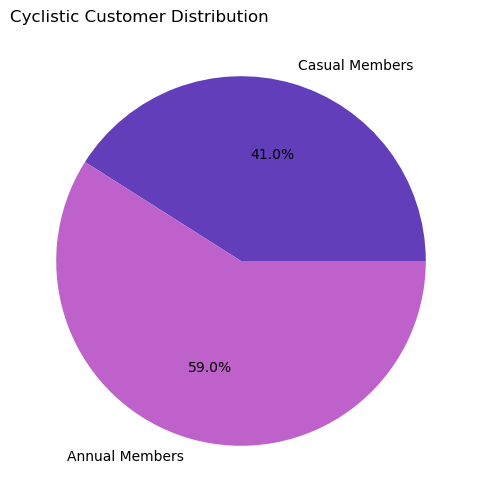

In [7]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

ax.pie(members, labels=['Casual Members', 'Annual Members'], colors=[ "#633EBB", "#BE61CA" ], autopct="%1.1f%%")
ax.set_title("Cyclistic Customer Distribution", loc="left", fontdict={})



In [8]:
# year summary of ride length by differnt users.
summary = data.groupby('member_casual')['ride_length'].agg(['count', 'mean', 'median', 'max', 'min'])
summary

,count,mean,median,max,min
member_casual,,,,,
casual,2274142,29.750023,13.300000,41387.25,1.0
member,3272486,12.989106,9.033333,1559.90,1.0


In [9]:
number_of_rides_day = data.groupby(['member_casual', 'day_of_week'])['ride_id'].count().unstack(level=0)

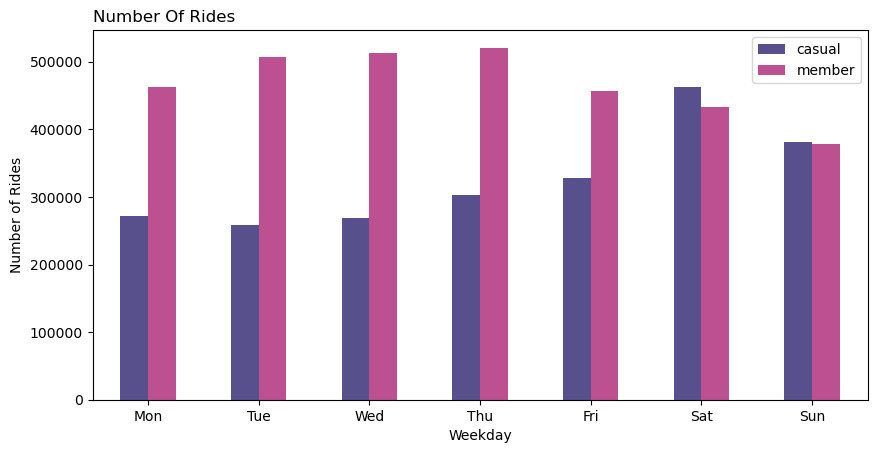

In [10]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
number_of_rides_day.plot.bar(ax=ax, color=["#58508d", "#bc5090"])
ax.set_title("Number Of Rides", loc="left")
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0)
ax.set_xlabel("Weekday")
ax.set_ylabel("Number of Rides")
ax.legend(loc="upper right")

In [11]:
# average ride length of users on different day
average_ride_day = data.groupby(['member_casual', 'day_of_week'])['ride_length'].agg('mean').unstack(level=0)

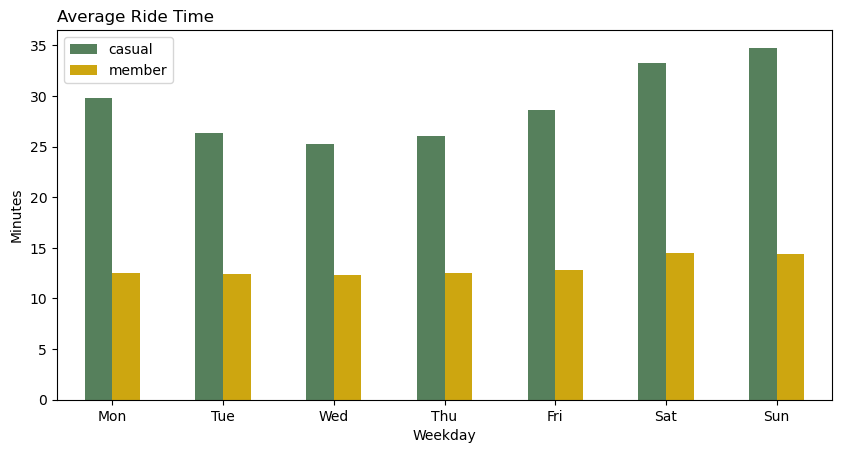

In [12]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
average_ride_day.plot.bar(ax=ax, color=["#56805c", "#cda610"])
ax.set_title("Average Ride Time", loc="left")
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0)
ax.set_xlabel("Weekday")
ax.set_ylabel("Minutes")
ax.legend(loc="upper left")

After yearly analysis we will try to find if there is any trend in monthly analysis. First we'll see a summary, then we will dive deep and figure out monthly number of rides, monthly average ride time, 

In [13]:
month_group = data.groupby(['month', 'member_casual'])

In [14]:
# number of rides, maximum, minimum, and average ride duration monthly
month_group['ride_length'].agg(['count', 'mean', 'median', 'max', 'min'])

count       mean     median           max  min
month member_casual                                                 
1     casual          18154  30.983211  10.316667  29271.100000  1.0
      member          83765  12.186936   7.616667   1499.950000  1.0
2     casual          20981  27.255419  11.116667  10905.966667  1.0
      member          92070  11.660263   7.683333   1499.933333  1.0
3     casual          88343  33.184094  14.516667  34354.066667  1.0
      member         190601  12.174208   8.183333   1559.900000  1.0
4     casual         124080  30.082007  14.133333  21122.200000  1.0
      member         239853  11.723297   8.066667   1499.966667  1.0
5     casual         275125  31.455576  15.616667  36257.800000  1.0
      member         347319  13.632637   9.583333   1499.933333  1.0
6     casual         361929  32.722379  14.650000  35820.633333  1.0
      member         391891  14.285694  10.250000   1499.950000  1.0
7     casual         397648  29.888127  14.366667  34208.816667  1.0
      member         408026  14.025024  10.133333   1499.933333  1.0
8     casual         351164  29.948316  13.283333  28129.366667  1.0
      member         417206  13.688826   9.816667   1499.950000  1.0
9     casual         290384  28.584086  12.300000  27697.566667  1.0
      member         395425  13.268173   9.316667   1499.950000  1.0
10    casual         204205  26.995517  11.083333  41387.250000  1.0
      member         341370  12.240124   8.300000   1499.950000  1.0
11    casual          98383  21.802502   9.450000  19612.600000  1.0
      member         231675  11.376080   7.800000   1499.933333  1.0
12    casual          43746  22.864047   8.316667  19157.100000  1.0
      member         133285  10.897764   7.433333   1499.933333  1.0

In [15]:
# Number of customers
members_month = data.groupby('month')['ride_id'].count()

Text(0.5, 0, 'Months')

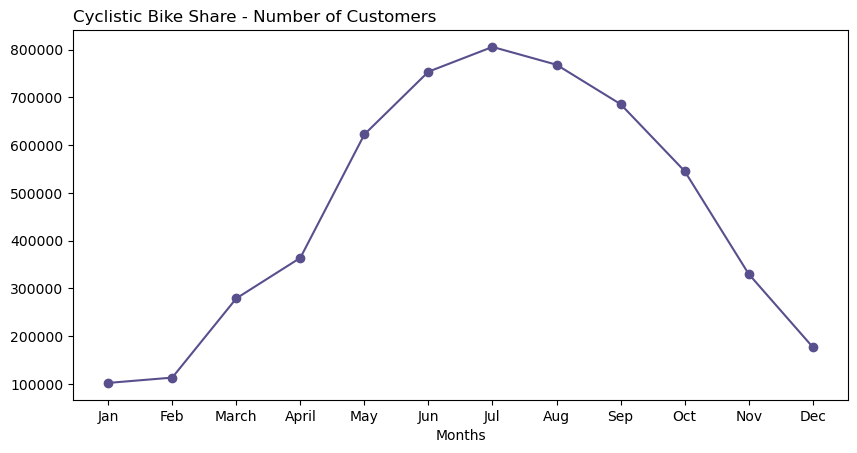

In [16]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
ax.plot(members_month, color="#58508d", marker="o")
ax.set_title("Cyclistic Bike Share - Number of Customers", loc="left")
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(["Jan", "Feb", "March", "April", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)
ax.set_xlabel("Months")

In [17]:
# number of rides monthly
number_of_rides_monthly = month_group['ride_id'].count().unstack()
number_of_rides_monthly

member_casual,casual,member
month,,
1,18154,83765
2,20981,92070
3,88343,190601
4,124080,239853
5,275125,347319
6,361929,391891
7,397648,408026
8,351164,417206
9,290384,395425


Text(0.5, 0, 'Months')

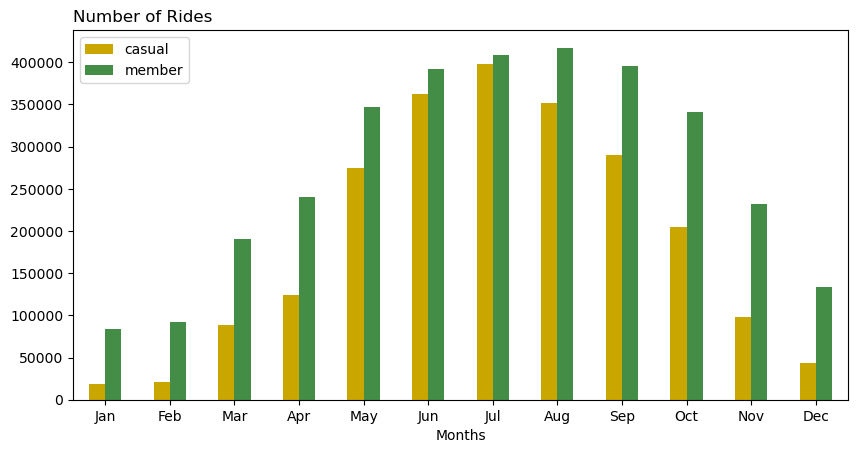

In [18]:
fig, ax = plt.subplots()
fig.set_figwidth(10)

number_of_rides_monthly.plot.bar(ax=ax, color=["#c9a700", "#438d46"])
ax.set_title("Number of Rides", loc="left")
ax.legend(loc="upper left")
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)
ax.set_xlabel("Months")

In [19]:
# monthly average ride time
average_monthly_ride = month_group['ride_length'].mean().unstack()
average_monthly_ride

member_casual,casual,member
month,,
1,30.983211,12.186936
2,27.255419,11.660263
3,33.184094,12.174208
4,30.082007,11.723297
5,31.455576,13.632637
6,32.722379,14.285694
7,29.888127,14.025024
8,29.948316,13.688826
9,28.584086,13.268173


Text(0, 0.5, 'Minutes')

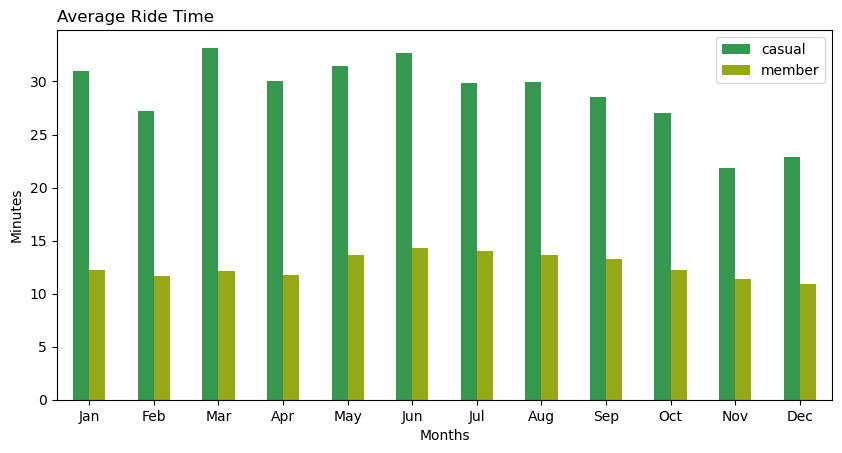

In [20]:
fig, ax = plt.subplots()
fig.set_figwidth(10)

average_monthly_ride.plot.bar(ax=ax, color=["#36974f", "#96a816"])
ax.set_title("Average Ride Time", loc="left")
ax.legend(loc="upper right")
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)
ax.set_xlabel("Months")
ax.set_ylabel("Minutes")

Analysis based on different kinds of bikes. We will see what types of bikes Cyclistic use and what are their distribution. Which kind of bike customers usually ride. 

In [21]:
bike_kind = data.groupby(['rideable_type', 'member_casual'])

In [22]:
# number of user of different bikes
bike_kind['ride_id'].count().unstack()

member_casual,casual,member
rideable_type,,
classic_bike,878682.0,1684008.0
docked_bike,175958.0,NaN
electric_bike,1219502.0,1588478.0


In [23]:
# Different kinds of bikes
number_of_bikes = data.groupby('rideable_type')['ride_id'].count()

Text(0.0, 1.0, 'Cyclistic Members - Kinds Of Bikes')

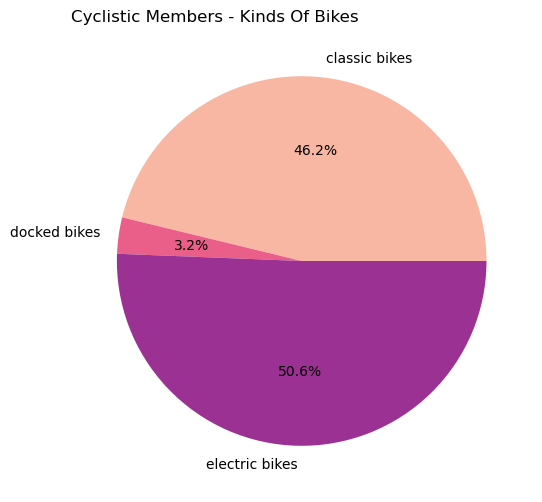

In [24]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

ax.pie(number_of_bikes, labels=['classic bikes', 'docked bikes', 'electric bikes'], autopct="%1.1f%%", colors=["#F7B7A3", "#EA5F89", "#9B3192"])
ax.set_title("Cyclistic Members - Kinds Of Bikes", loc="left")